#Creation of Model

## Importing libraries

In [3]:
# !pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from random import randint
from sklearn.model_selection import train_test_split

tf.__version__

'2.2.0'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


 ## Loading the MNIST dataset

In [7]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [8]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [9]:
class_names = [str(i) for i in range(10)]
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

## Data Preproccessing and plotting

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [11]:
def draw_image(image, title=None):
    plt.imshow(image, cmap="binary")
    plt.grid(False)
    plt.xticks(())
    if title:
        plt.xlabel(title, color="grey")
    plt.yticks(())

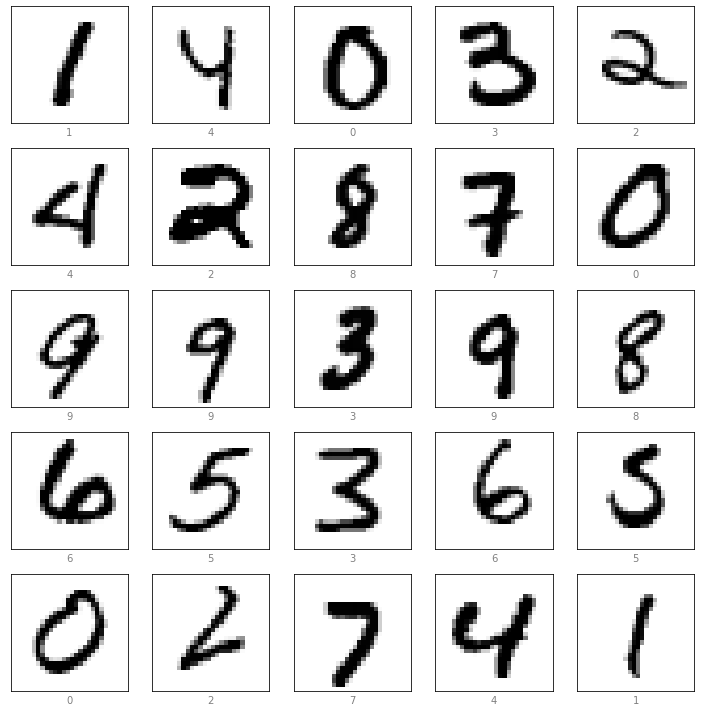

In [12]:
n=5

fig = plt.figure(figsize=(2*n, 2*n))

for i in range(n*n):
    plt.subplot(n,n,i+1)
    i = randint(0, 59999)
    draw_image(train_images[i], str(class_names[train_labels[i]]))

fig.tight_layout()
plt.show()

In [13]:
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

In [14]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=3,
    height_shift_range=3,
    shear_range=0.1
)

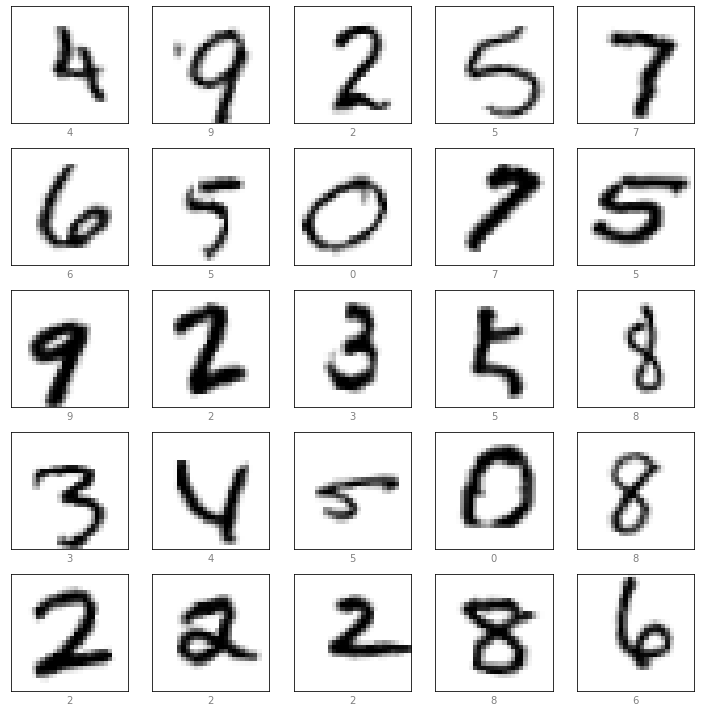

In [15]:
n=5

x, y = datagen.flow(train_images, train_labels, batch_size=n*n).next()
fig = plt.figure(figsize=(2*n, 2*n))

for i in range(n*n):
    plt.subplot(n,n,i+1)
    draw_image(x[i].reshape(28,28), str(class_names[y[i]]))

fig.tight_layout()
plt.show()

## Designing CNN & Compiling it

In [18]:
model = keras.Sequential([
    keras.layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),

    keras.layers.Dropout(0.4),

    keras.layers.Conv2D(32, 5, strides=2, padding='same', activation='relu'),

    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),

    keras.layers.Dropout(0.4),

    keras.layers.Conv2D(64, 5, strides=2, padding='same', activation='relu'),

    keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    keras.layers.Conv2D(128, 3, padding='same', activation='relu'),

    keras.layers.Dropout(0.4),

    keras.layers.Flatten(),

    keras.layers.Dense(32, activation='relu'),

    keras.layers.Dropout(0.4),

    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Training the Model

In [25]:
history_model= None
train_accuracy_model =None
test_accuracy_model = None

filename = 'mnist-digits-model.hdf5'

new_train_images, val_images, new_train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.1)

history = model.fit_generator(
    datagen.flow(new_train_images, new_train_labels, batch_size=500),
    validation_data=(val_images, val_labels),
    epochs=100,
    verbose=1,
    callbacks=[
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.75, 
            patience=4,
            mode='min', 
            min_delta=0.0001,
            min_lr=1e-6
        ),
        keras.callbacks.ModelCheckpoint(
            filename,
            load_weights_on_restart=True,
            save_best_only=True                
        )
    ]
)

history_model = history.history

Epoch 1/100
108/108 [==============================] - 15s 141ms/step - loss: 0.0184 - accuracy: 0.9952 - val_loss: 0.0040 - val_accuracy: 0.9990 - lr: 3.1712e-06
Epoch 2/100
108/108 [==============================] - 15s 142ms/step - loss: 0.0168 - accuracy: 0.9953 - val_loss: 0.0040 - val_accuracy: 0.9990 - lr: 3.1712e-06
Epoch 3/100
108/108 [==============================] - 15s 142ms/step - loss: 0.0180 - accuracy: 0.9948 - val_loss: 0.0041 - val_accuracy: 0.9990 - lr: 3.1712e-06
Epoch 4/100
108/108 [==============================] - 15s 143ms/step - loss: 0.0159 - accuracy: 0.9952 - val_loss: 0.0041 - val_accuracy: 0.9990 - lr: 3.1712e-06
Epoch 5/100
108/108 [==============================] - 15s 141ms/step - loss: 0.0146 - accuracy: 0.9956 - val_loss: 0.0041 - val_accuracy: 0.9990 - lr: 3.1712e-06
Epoch 6/100
108/108 [==============================] - 15s 142ms/step - loss: 0.0173 - accuracy: 0.9951 - val_loss: 0.0040 - val_accuracy: 0.9990 - lr: 2.3784e-06
Epoch 7/100
108/108 [=

## Checking the Train & Test Accuracy


Evaluating on Train samples
Train Accuracy: 0.9991166591644287

Evaluating on Test samples
Test Accuracy: 0.9961000084877014


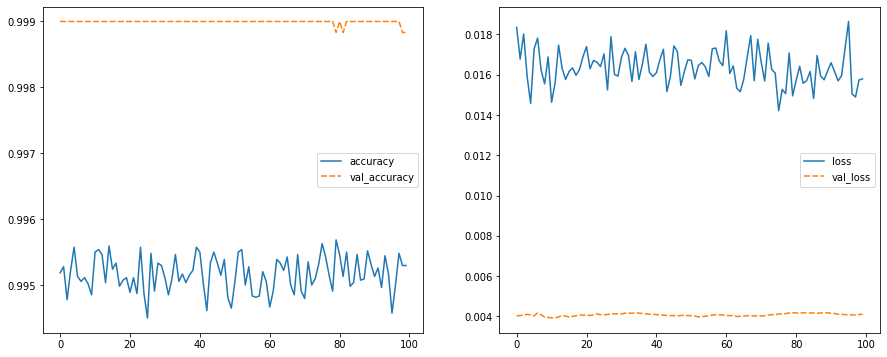

In [26]:
print("\nEvaluating on Train samples")
_, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
print(f"Train Accuracy: {train_accuracy}")
print("\nEvaluating on Test samples")
_, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test Accuracy: {test_accuracy}")

train_accuracy_model = train_accuracy
test_accuracy_model = test_accuracy

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.lineplot(data=pd.DataFrame(history.history)[["accuracy", "val_accuracy"]])

plt.subplot(1,2,2)
sns.lineplot(data=pd.DataFrame(history.history)[["loss", "val_loss"]])

plt.show()

## Saving the Model

In [27]:
model.save('mnist-digits-final-model.hdf5')

#Visualization of CNN Filters

##loading the model

In [38]:
model = keras.models.load_model("mnist-digits-final-model.hdf5")

## Summary of the model

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
dropout_8 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 32)        25632     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 64)       

## Configuration for model and plotting of activation layers

In [40]:
layer_outputs = [layer.output for layer in model.layers if "conv" in layer.name]

activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

In [41]:
number_data = [None]*10

for i in range(randint(0,50000), train_labels.shape[0]):
    if not number_data[train_labels[i]]:
        number_data[train_labels[i]]=i
        if all(number_data):
            break

number_data = [train_images[i].reshape([28,28]) for i in number_data]

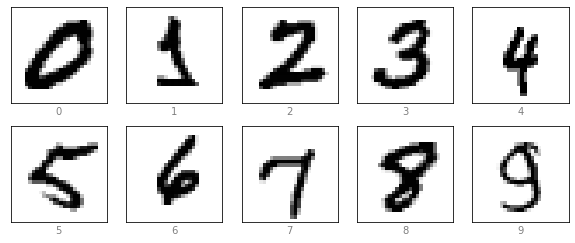

In [42]:
fig = plt.figure(figsize=(2*5, 2*2))

for i in range(10):
    plt.subplot(2,5,i+1)
    draw_image(number_data[i], str(i))

plt.show()

In [43]:
activations = [activation_model.predict(number_data[i].reshape([1,28,28,1])) for i in range(10)]

In [44]:
input_number = 0
layer_number = 4
filter_number = 10
layer_kernel_size = 14

In [51]:
import math
def draw_filters(activations, input_number, n_layers, filter_counts, kernel_sizes, n_cols=16, fig_scale=1.25):
    print(f"\n____________________ Number: {input_number} ____________________")
    for layer_number, filter_count, kernel_size in zip(range(8), filter_counts, kernel_sizes):
        n_rows = math.ceil(filter_count/n_cols)

        fig = plt.figure(figsize=(fig_scale*n_cols, fig_scale*n_rows))

        print(f"\n_________ Layer: {layer_number} __________")

        for filter_number in range(filter_count):
            plt.subplot(n_rows, n_cols, filter_number+1)
            draw_image(activations[input_number][layer_number][:,:,:,filter_number].reshape(kernel_size,kernel_size))

        plt.subplots_adjust(wspace=0, hspace=0)
        plt.show()

In [52]:
n_layers = 8
filter_counts = [32,32,32,64,64,64,128,128]
kernel_sizes = [28,28,14,14,14,7,7,7]

n_cols = 16
fig_scale = 1.25


____________________ Number: 6 ____________________

_________ Layer: 0 __________


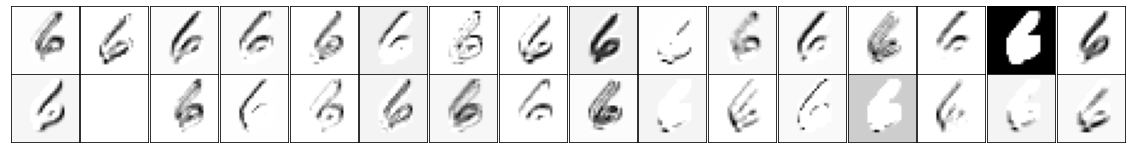


_________ Layer: 1 __________


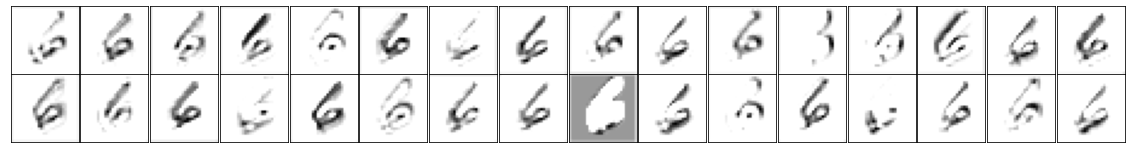


_________ Layer: 2 __________


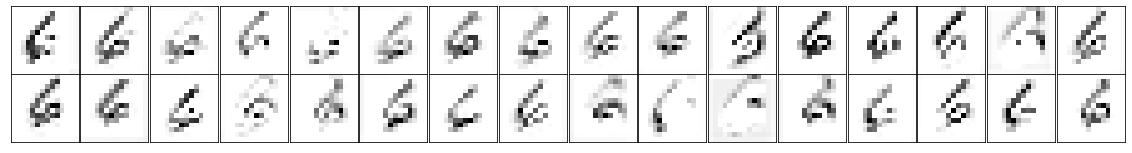


_________ Layer: 3 __________


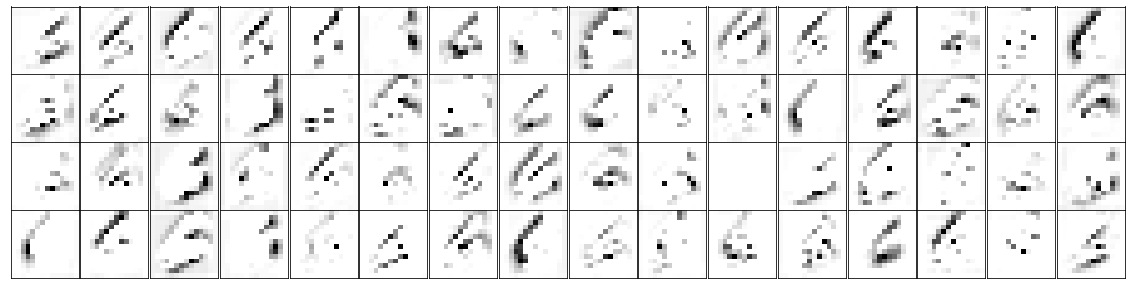


_________ Layer: 4 __________


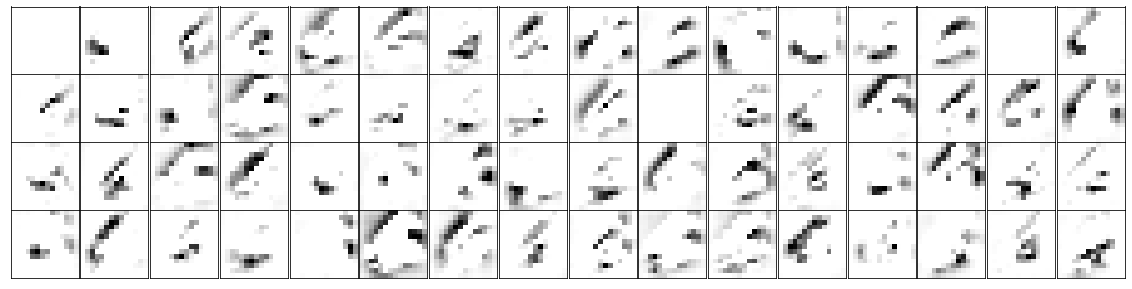


_________ Layer: 5 __________


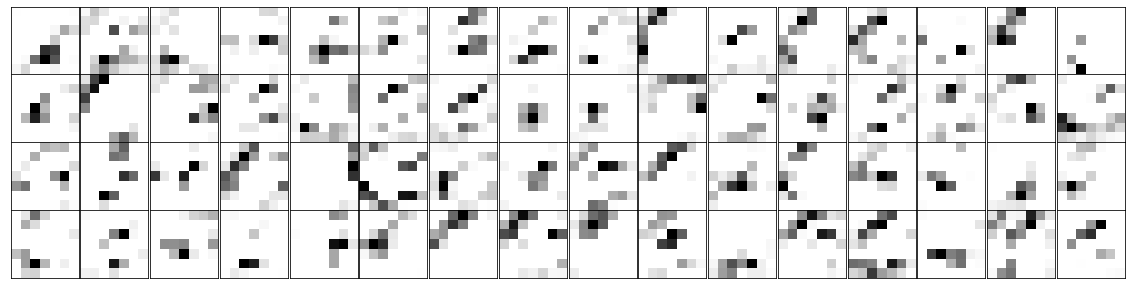


_________ Layer: 6 __________


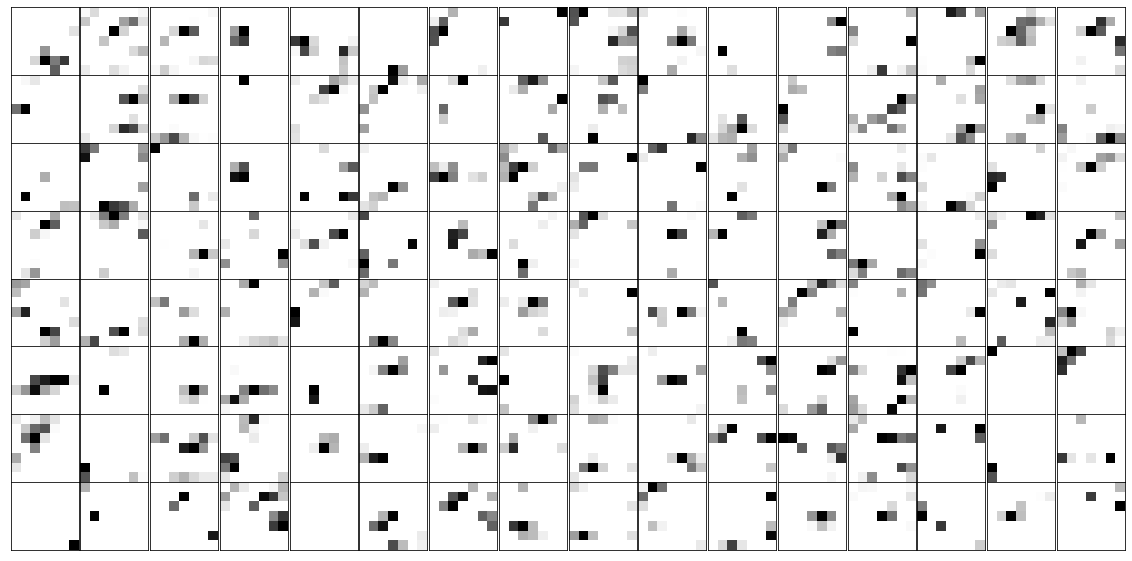


_________ Layer: 7 __________


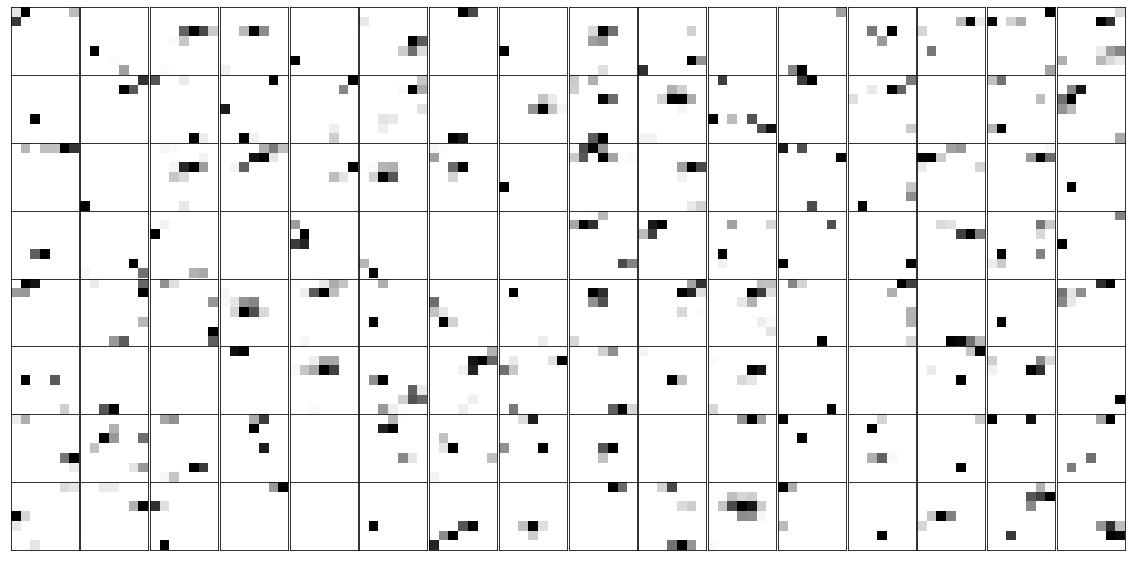

In [53]:
draw_filters(activations, 6, n_layers, filter_counts, kernel_sizes, n_cols, fig_scale)

# Converting the model into tflite model for using in other applications

In [ ]:
tflite_model = tf.keras.models.load_model('/content/sample_data/mnist-digits-final-model.hdf5')
converter = tf.lite.TFLiteConverter.from_keras_model(tflite_model)
tflite_save = converter.convert()
open("generated.tflite", "wb").write(tflite_save)

2466188